In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import rdRGroupDecomposition as rdRGD
import pandas as pd

In [2]:
# Read in the CSV file
file_name = 'spreadsheet2.csv'
data = pd.read_csv(file_name, delimiter=',')
data.head(2)

,Index,Tag,Atag,Btag,pIC50_MMP12,Smiles,A_SortMax,B_SortMax,Final QC Purity,Generation-No
0,1,A01B01,A01,B01,6.5,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,7,12,>98,Gen-5
1,2,A01B02,A01,B02,6.8,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,7,5,>98,Gen-3


,Smiles,ROMol
0,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,
1,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,

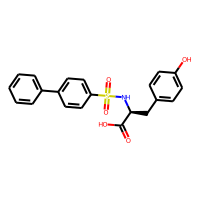
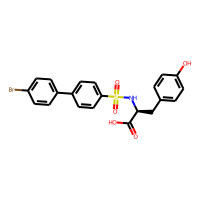

In [3]:
# Add molecule column to dataframe
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='Smiles', molCol='ROMol')
data[['Smiles', 'ROMol']].head(n=2)

In [4]:
# Define a class to return the r groups in a dataframe when a scaffold is given (in smiles)
class Get_r_groups:
    def __init__(self, smiles):
        self.smiles = smiles

    def get_r(self):
        scaffold = Chem.MolFromSmiles(self.smiles)
        mols = [Chem.MolFromSmiles(x) for x in data['Smiles']]
        groups,_ = rdRGD.RGroupDecompose([scaffold], mols, asSmiles=True)
        groups_frame = pd.DataFrame(groups)
        return groups_frame

In [5]:
r_groups = Get_r_groups('O=S(C1=CC=CC=C1)(NCC(O)=O)=O').get_r()

In [6]:
r_groups.head()

,Core,R1,R2
0,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],c1ccc([*:2])cc1
1,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],Brc1ccc([*:2])cc1
2,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],O=[N+]([O-])c1cccc([*:2])c1
3,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],Cc1ccc([*:2])cc1
4,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],Oc1ccc(C[*:1])cc1.[H][*:1],c1ccc2c(c1)oc1c([*:2])cccc12


In [9]:
# Print the number of unique smiles strings 
print(len(r_groups['Core'].unique()))
print(len(r_groups['R1'].unique()))
print(len(r_groups['R2'].unique()))

1
50
50


In [10]:
# Save to a csv file
r_groups.to_csv(r'r_groups.csv')

In [12]:
# Create a new dataframe and add the Atag, Btag and pIC50 columns
r_groups_pIC50 = r_groups.copy()
r_groups_pIC50.head(2)
r_groups_pIC50.insert(1, 'Atag', data['Atag'])
r_groups_pIC50.insert(3, 'Btag', data['Btag'])
r_groups_pIC50.insert(5, 'pIC50', data['pIC50_MMP12'])

In [13]:
r_groups_pIC50.head()

,Core,Atag,R1,Btag,R2,pIC50
0,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B01,c1ccc([*:2])cc1,6.5
1,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B02,Brc1ccc([*:2])cc1,6.8
2,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B03,O=[N+]([O-])c1cccc([*:2])c1,Assay Failed
3,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B04,Cc1ccc([*:2])cc1,7.1
4,O=C(O)C(NS(=O)(=O)c1ccc([*:2])cc1)[*:1],A01,Oc1ccc(C[*:1])cc1.[H][*:1],B05,c1ccc2c(c1)oc1c([*:2])cccc12,5.1


In [14]:
# Save to a csv file
r_groups_pIC50.to_csv(r'r_groups_pIC50')